In [32]:
import pandas as pd
import io
import requests
import numpy as np

In [33]:
url="https://raw.githubusercontent.com/JULIELab/EmoBank/master/corpus/emobank.csv"
s=requests.get(url).content
emodata=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [34]:
emodata.head()

,id,V,A,D,text
0,110CYL068_1036_1079,3.00,3.00,3.20,"Remember what she said in my last letter? """
1,110CYL068_1079_1110,2.80,3.10,2.80,If I wasn't working here.
2,110CYL068_1127_1130,3.00,3.00,3.00,".."""
3,110CYL068_1137_1188,3.44,3.00,3.22,Goodwill helps people get off of public assist...
4,110CYL068_1189_1328,3.55,3.27,3.46,Sherry learned through our Future Works class ...


The columns V, A and D represent Valence (negative vs. positive), Arousal (calm vs. excited), and Dominance (being controlled vs. being in control). Each of those take numeric values from [1, 5]. Please refer to the paper for further details.

Norm according to this paper- https://aclweb.org/anthology/E17-2092

In [35]:
max_v = max(emodata.V)
max_a = max(emodata.A)
max_d = max(emodata.D)
emodata.V = (emodata.V - 1) / 4
emodata.A = (emodata.A - 1) / 4
emodata.D = (emodata.D - 1) / 4


#emodata = emodata.rename(columns={'V': 'Neutral', 'A': 'Position'})
emodata.head()

,id,V,A,D,text
0,110CYL068_1036_1079,0.5000,0.5000,0.550,"Remember what she said in my last letter? """
1,110CYL068_1079_1110,0.4500,0.5250,0.450,If I wasn't working here.
2,110CYL068_1127_1130,0.5000,0.5000,0.500,".."""
3,110CYL068_1137_1188,0.6100,0.5000,0.555,Goodwill helps people get off of public assist...
4,110CYL068_1189_1328,0.6375,0.5675,0.615,Sherry learned through our Future Works class ...


In [36]:
min(emodata.V)

0.04999999999999999

In [37]:
sentiments = pd.read_csv('Sentiment_Data.csv')
sentiments.head()

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons


## Test just 4 emotions

In [38]:
sub_sentiments = []
sub_sentiments.append(sentiments.loc[23, :])
sub_sentiments.append(sentiments.loc[0, :])
sub_sentiments.append(sentiments.loc[97, :])
sub_sentiments.append(sentiments.loc[3, :])
sub_sentiments = pd.DataFrame(sub_sentiments)
sub_sentiments = sub_sentiments.reset_index()
sub_sentiments['Emotion'] = 'None'
sub_sentiments.loc[0, 'Emotion'] = 'Sadness' 
sub_sentiments.loc[1, 'Emotion'] = 'Joy'
sub_sentiments.loc[2, 'Emotion'] = 'Anger'
sub_sentiments.loc[3, 'Emotion'] = 'Love'
sub_sentiments['V'] = 0
sub_sentiments.loc[2, 'V'] = 2.50
sub_sentiments.loc[1, 'V'] = 8.21
sub_sentiments.loc[0, 'V'] = 2.40
sub_sentiments.loc[3, 'V'] = 8.00
max_v = max(sub_sentiments.V)
sub_sentiments.V = sub_sentiments.V/max_v
sub_sentiments['A'] = 0
sub_sentiments.loc[2, 'A'] = 5.93
sub_sentiments.loc[1, 'A'] = 5.55
sub_sentiments.loc[0, 'A'] = 2.81
sub_sentiments.loc[3, 'A'] = 5.36
max_a = max(sub_sentiments.A)
sub_sentiments.A = sub_sentiments.A/max_a
sub_sentiments['D'] = 0
sub_sentiments.loc[2, 'D'] = 5.14
sub_sentiments.loc[1, 'D'] = 7.00
sub_sentiments.loc[0, 'D'] = 3.84
sub_sentiments.loc[3, 'D'] = 5.92
max_d = max(sub_sentiments.D)
sub_sentiments.D = sub_sentiments.D/max_d
sub_sentiments = sub_sentiments[['Emoji', 'Emotion', 'V', 'A', 'D']]
sub_sentiments

,Emoji,Emotion,V,A,D
0,😒,Sadness,0.292326,0.473862,0.548571
1,😂,Joy,1.000000,0.935919,1.000000
2,😠,Anger,0.304507,1.000000,0.734286
3,😍,Love,0.974421,0.903879,0.845714


In [39]:
def mergeDfs3D(left, right): 
    left['Emoji'] = 'None'
    for i in range(len(left)):
        min_dist = 100000
        for j in range(len(right)):
            diff_V = left.V[i] - right.V[j]
            diff_A = left.A[i] - right.A[j]
            if 'D' in left.columns and 'D' in right.columns:
                diff_D = left.D[i] - right.D[j]
                euclid_dist = np.power((np.power(diff_V, 2) + np.power(diff_A, 2) + np.power(diff_D, 2)), 0.5)
            else:
                euclid_dist = np.power((np.power(diff_V, 2) + np.power(diff_A, 2)), 0.5)
            if euclid_dist < min_dist:
                min_dist = euclid_dist
                index = j
        if min_dist<0.3:
            left.loc[i, 'Emoji'] = right.loc[index, 'Emoji']  
    return left

In [40]:
four_emotions = mergeDfs3D(emodata, sub_sentiments)

In [41]:
four_emotions = four_emotions[['text', 'V', 'A', 'D', 'Emoji']]
four_emotions.head()

,text,V,A,D,Emoji
0,"Remember what she said in my last letter? """,0.5000,0.5000,0.550,😒
1,If I wasn't working here.,0.4500,0.5250,0.450,😒
2,"..""",0.5000,0.5000,0.500,😒
3,Goodwill helps people get off of public assist...,0.6100,0.5000,0.555,None
4,Sherry learned through our Future Works class ...,0.6375,0.5675,0.615,None


In [42]:
len(four_emotions)

10062

In [43]:
len(four_emotions[four_emotions.Emoji != 'None'])

8767

In [44]:
four_emotions = four_emotions[four_emotions.Emoji != 'None']

In [45]:
four_emotions[four_emotions.Emoji == '😍']

,text,V,A,D,Emoji
849,"""I am thrilled with the price.""",0.8900,0.750,0.6950,😍
3984,“That’s amazing!”,0.8250,0.800,0.6250,😍
5466,News Baby pandas! Baby pandas! Baby pandas!,0.8325,0.805,0.6675,😍
7785,"Catching herself, she said casually, ""Oh..."" A...",0.7775,0.805,0.6675,😍
7787,"""My God, yes, yes, yes!""",0.8250,0.850,0.6000,😍
7856,"""Tell her I love her.""",0.8500,0.775,0.7000,😍
7996,"I'm in love.""",0.8425,0.780,0.6250,😍
8588,"With my Lab, Jay, I feel so wonderfully FREE!”",0.7750,0.775,0.7750,😍
9595,lol Wonderful Simply Superb!,0.9000,0.825,0.6750,😍


In [46]:
four_emotions.to_csv('four_emotions_test.csv')

## appendix data

Normalize according to this paper - https://link.springer.com/article/10.3758/s13428-017-0878-6#Sec14

In [47]:
appendix = pd.read_excel('Appendix 1.xlsx')
appendix = appendix.rename(columns={'Intended Meaning': 'Unicode name'})
appendix['Unicode name'] = appendix['Unicode name'].str.upper()
appendix.V = (appendix.V - 1)/6
appendix.A = (appendix.A - 1)/6
appendix.head()

,Unicode name,V,A
0,GRINNING FACE,0.800000,0.648333
1,GRINNING FACE WITH SMILING EYES,0.868333,0.718333
2,FACE WITH TEARS OF JOY,0.851667,0.790000
3,SMILING FACE WITH OPEN MOUTH,0.796667,0.481667
4,SMILING FACE WITH OPEN MOUTH AND SMILING EYES,0.850000,0.655000


In [48]:
# add V, A to sentiments
# duplications due to the different operating systems (Android, IOS)
sentiments_va = pd.merge(sentiments, appendix, on='Unicode name').drop_duplicates()
sentiments_va.head()

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block,V,A
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons,0.851667,0.790000
1,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons,0.811667,0.851667
2,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons,0.905000,0.805000
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons,0.926667,0.856667
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons,0.068333,0.841667


In [49]:
result = mergeDfs3D(emodata, sentiments_va)
result = result[['text', 'V', 'A', 'Emoji']]

In [50]:
result

,text,V,A,Emoji
0,"Remember what she said in my last letter? """,0.5000,0.5000,💏
1,If I wasn't working here.,0.4500,0.5250,😮
2,"..""",0.5000,0.5000,💏
3,Goodwill helps people get off of public assist...,0.6100,0.5000,😏
4,Sherry learned through our Future Works class ...,0.6375,0.5675,😏
5,Coming to Goodwill was the first step toward m...,0.6500,0.5750,😏
6,"I am now... totally off of welfare.""",0.5000,0.5000,💏
7,Goodwill prepares people for life-long employm...,0.5250,0.5250,✋
8,Here's another story of success from what migh...,0.5625,0.4700,😛
9,Cornell found a number of employment options t...,0.5625,0.5000,😛


In [51]:
len(result[result.Emoji != 'None'])

10062

NameError: name 'plt' is not defined

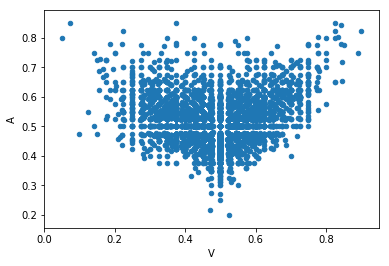

In [52]:
result.plot.scatter(x='V', y='A')
plt.show()

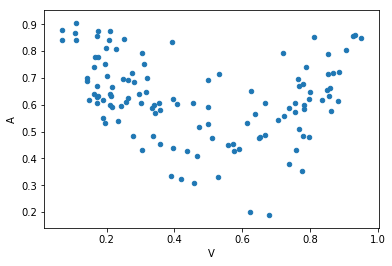

In [53]:
sentiments_va.plot.scatter(x='V', y='A')

In [54]:
result.to_csv('appendix1_test.csv')

## Stop here (old )

## Trying to define V from original sentiments data

In [7]:
max_Negative = max(sentiments.Negative)
max_Neutral = max(sentiments.Neutral)
max_Positive = max(sentiments.Positive)
max_val = max(max_Negative, max_Neutral, max_Positive)
sentiments.Negative = sentiments.Negative / max_val
sentiments.Neutral = sentiments.Neutral / max_val
sentiments.Positive = sentiments.Positive / max_val

In [7]:
sentiments.to_csv("text.csv")

In [8]:
a = 0.33
b = 0.66
emodata['Emoji'] = 'None'
emodata['Positive'] = 'None'
emodata['Neutral'] = 'None'
emodata['Negative'] = 'None'
for i in range(len(emodata)):
    index = 0
    correctness = 1
    if emodata.loc[i, 'V'] <= a:
        neg_to_neut = emodata.loc[i, 'V'] / a
        for j in range(51):
            if sentiments.loc[j, 'Negative'] > sentiments.loc[j, 'Positive'] and sentiments.loc[j, 'Negative'] > sentiments.loc[j, 'Neutral'] :
                neg_to_neut_j = sentiments.loc[j, 'Neutral'] / sentiments.loc[j, 'Negative']
                if abs(neg_to_neut - neg_to_neut_j) < correctness:
                    correctness = abs(neg_to_neut - neg_to_neut_j)
                    index = j
    if a < emodata.loc[i, 'V'] <= b:
        neg_to_neut = a / emodata.loc[i, 'V']
        pos_to_neut = emodata.loc[i, 'V'] / b
        for j in range(51):
            if sentiments.loc[j, 'Neutral'] > sentiments.loc[j, 'Negative'] and sentiments.loc[j, 'Neutral'] > sentiments.loc[j, 'Positive'] :
                neg_to_neut_j = sentiments.loc[j, 'Negative'] / sentiments.loc[j, 'Neutral']
                pos_to_neut_j = sentiments.loc[j, 'Positive'] / sentiments.loc[j, 'Neutral']
                if abs(neg_to_neut - neg_to_neut_j) < correctness and abs(pos_to_neut - pos_to_neut_j) < correctness:
                    correctness = max(abs(neg_to_neut - neg_to_neut_j), abs(pos_to_neut - pos_to_neut_j))
                    index = j
    if emodata.loc[i, 'V'] > b:
        pos_to_neut = b / emodata.loc[i, 'V']
        for j in range(51):
            if sentiments.loc[j, 'Positive'] > sentiments.loc[j, 'Neutral'] and sentiments.loc[j, 'Positive'] > sentiments.loc[j, 'Negative'] :
                pos_to_neut_j = sentiments.loc[j, 'Neutral'] / sentiments.loc[j, 'Positive']
                if abs(pos_to_neut - pos_to_neut_j) < correctness:
                    correctness = abs(pos_to_neut - pos_to_neut_j)
                    index = j
            
    emodata.loc[i, 'Emoji'] = sentiments.loc[index, 'Emoji']
    emodata.loc[i, 'Positive'] = sentiments.loc[index, 'Positive']
    emodata.loc[i, 'Neutral'] = sentiments.loc[index, 'Neutral']
    emodata.loc[i, 'Negative'] = sentiments.loc[index, 'Negative']

In [9]:
emodata

,V,A,text,Emoji,Positive,Neutral,Negative
0,0.652174,0.681818,"Remember what she said in my last letter? """,✨,0.0499635,0.0676406,0.00628196
1,0.608696,0.704545,If I wasn't working here.,✨,0.0499635,0.0676406,0.00628196
2,0.652174,0.681818,"..""",✨,0.0499635,0.0676406,0.00628196
3,0.747826,0.681818,Goodwill helps people get off of public assist...,🙏,0.112053,0.0946676,0.0181154
4,0.771739,0.743182,Sherry learned through our Future Works class ...,🙏,0.112053,0.0946676,0.0181154
5,0.782609,0.750000,Coming to Goodwill was the first step toward m...,🙏,0.112053,0.0946676,0.0181154
6,0.652174,0.681818,"I am now... totally off of welfare.""",✨,0.0499635,0.0676406,0.00628196
7,0.673913,0.704545,Goodwill prepares people for life-long employm...,☀,0.0566837,0.0550767,0.00306793
8,0.706522,0.654545,Here's another story of success from what migh...,😳,0.0426589,0.0404675,0.0404675
9,0.706522,0.681818,Cornell found a number of employment options t...,😳,0.0426589,0.0404675,0.0404675


In [10]:
emodata.to_csv('emodata_050519.csv')

## later is old code

In [6]:
max(sentiments.Neutral)

4163

In [7]:
sentiments = sentiments[['Emoji', 'Position', 'Neutral', 'Unicode name']]
sentiments.head()

,Emoji,Position,Neutral,Unicode name
0,😂,0.805101,4163,FACE WITH TEARS OF JOY
1,❤,0.746943,1334,HEAVY BLACK HEART
2,♥,0.753806,1942,BLACK HEART SUIT
3,😍,0.765292,1390,SMILING FACE WITH HEART-SHAPED EYES
4,😭,0.803352,1218,LOUDLY CRYING FACE


In [8]:
# norm Neutral col
max_val = max(sentiments.Neutral)
sentiments.Neutral = sentiments.Neutral / max_val
sentiments.head()

,Emoji,Position,Neutral,Unicode name
0,😂,0.805101,1.000000,FACE WITH TEARS OF JOY
1,❤,0.746943,0.320442,HEAVY BLACK HEART
2,♥,0.753806,0.466491,BLACK HEART SUIT
3,😍,0.765292,0.333894,SMILING FACE WITH HEART-SHAPED EYES
4,😭,0.803352,0.292577,LOUDLY CRYING FACE


In [9]:
def mergeDfs(left, right): 
    left['Emoji'] = 0
    for i in range(len(left)):
        min_dist = 100000
        for j in range(len(right)):
            diff_Position = left.Position[i] - right.Position[j]
            diff_Neutral = left.Neutral[i] - right.Neutral[j]
            euclid_dist = np.power((np.power(diff_Position, 2) + np.power(diff_Neutral, 2)), 0.5)
            if euclid_dist < min_dist:
                min_dist = euclid_dist
                index = j
        left.loc[i, 'Emoji'] = right.loc[index, 'Emoji']  
    return left

In [10]:
df = mergeDfs(emodata, sentiments)

In [11]:
df.head()

,Neutral,Position,text,Emoji
0,0.652174,0.681818,"Remember what she said in my last letter? """,♥
1,0.608696,0.704545,If I wasn't working here.,♥
2,0.652174,0.681818,"..""",♥
3,0.747826,0.681818,Goodwill helps people get off of public assist...,😂
4,0.771739,0.743182,Sherry learned through our Future Works class ...,😂


In [12]:
df.to_csv('merged.csv')

In [13]:
df.Emoji.unique()

array(['♥', '😂', '😍', '😘', '😭', '❤'], dtype=object)

In [14]:
sentiments.Emoji.unique()

array(['😂', '❤', '♥', '😍', '😭', '😘', '😊', '👌', '💕', '👏', '😁', '☺', '♡',
       '👍', '😩', '🙏', '✌', '😏', '😉', '🙌', '🙈', '💪', '😄', '😒', '💃', '💖',
       '😃', '😔', '😱', '🎉', '😜', '☯', '🌸', '💜', '💙', '✨', '😳', '💗', '★',
       '█', '☀', '😡', '😎', '😢', '💋', '😋', '🙊', '😴', '🎶', '💞', '😌', '🔥',
       '💯', '🔫', '💛', '💁', '💚', '♫', '😞', '😆', '😝', '😪', '�', '😫', '😅',
       '👊', '💀', '😀', '😚', '😻', '©', '👀', '💘', '🐓', '☕', '👋', '✋', '🎊',
       '🍕', '❄', '😥', '😕', '💥', '💔', '😤', '😈', '►', '✈', '🔝', '😰', '⚽',
       '😑', '👑', '😹', '👉', '🍃', '🎁', '😠', '🐧', '☆', '🍀', '🎈', '🎅', '😓',
       '😣', '😐', '✊', '😨', '😖', '💤', '💓', '👎', '💦', '✔', '😷', '⚡', '🙋',
       '🎄', '💩', '🎵', '➡', '😛', '😬', '👯', '💎', '🌿', '🎂', '🌟', '🔮', '❗',
       '👫', '🏆', '✖', '☝', '😙', '⛄', '👅', '♪', '🍂', '💏', '🔪', '🌴', '👈',
       '🌹', '🙆', '➜', '👻', '💰', '🍻', '🙅', '🌞', '🍁', '⭐', '▪', '🎀', '━',
       '☷', '🐷', '🙉', '🌺', '💅', '🐶', '🌚', '👽', '🎤', '👭', '🎧', '👆', '🍸',
       '🍷', '®', '🍉', '😇', '☑', '🏃', '😿', '│', '💣', '🍺', '▶', '😲